## Q1 explanation about modeling 

1. A student in a Modeling and Data Analysis course downloaded monthly San Diego temperature data covering the previous 2 years (n=24 data points). For each of the following methods, comment on whether it could potentially be an appropriate way of modeling the data. Explain your answer

a. Polynomial regression with polynomial order k=2?

    No, the curve when k =2 does not match the sin/cos like funciton of the 2 years temperature data.
 
b. Polynomial regression with order k=24?

    No, highly possible to be overfitting and uninterpretable

c. Polynomial regression with order k=48?
    
    No, highly possible to be overfit and uninterpretable

d. Spline regression with 35 knots?
    
    No, can not match the sin/cos like funciton of the 2 years temperature data.
   


## Q2  Principal component (PC) regression.
Principal component (PC) regression. Using the anesthesia dataset from last week, we will perform
PCA regression.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

In [334]:
df = pd.read_csv('anesthesia.csv')
df.head()

,Time,F0Hz_1,F1Hz_2,F3Hz_3,F4Hz_4,F5Hz_5,F6Hz_6,F8Hz_7,F9Hz_8,F10Hz_9,...,F115Hz_95,F116Hz_96,F117Hz_97,F119Hz_98,F120Hz_99,F121Hz_100,F122Hz_101,F124Hz_102,F125Hz_103,BehaviorResponse
0,5.004,3.115293,1.676500,1.097419,0.900837,0.537178,0.454494,0.512818,-0.131658,-0.121557,...,-3.219340,-3.164443,-3.336400,-3.259790,-3.270283,-3.219549,-3.275714,-3.298578,-3.314389,1.0
1,15.004,2.864158,1.499845,0.879378,1.020294,0.281333,0.722017,0.086080,0.080071,0.119713,...,-2.654771,-2.591587,-2.877959,-3.199018,-2.826822,-2.686335,-2.703506,-2.967259,-3.050596,1.0
2,25.004,2.039253,1.057344,0.163134,0.351954,0.149567,0.325558,0.231917,0.284673,-0.079226,...,-2.806694,-2.936570,-2.922557,-3.094296,-3.047691,-2.992025,-2.997460,-3.022261,-3.012685,1.0
3,35.004,2.417074,0.348083,0.582521,0.468952,0.176949,0.116783,0.200230,0.166558,0.185396,...,-3.646892,-3.907626,-3.773453,-3.645338,-3.830424,-4.055349,-4.010275,-3.829455,-3.847508,1.0
4,45.004,2.507836,1.036731,0.622822,0.436470,0.465713,0.703881,0.048926,-0.327707,0.073882,...,-2.835312,-2.807076,-2.909298,-3.070029,-2.993807,-2.875189,-2.894030,-3.065111,-3.130724,1.0


### a) Compute the standard deviation (s.d.) of each of the predictors and make a plot showing them. Which frequency band has the largest s.d.?


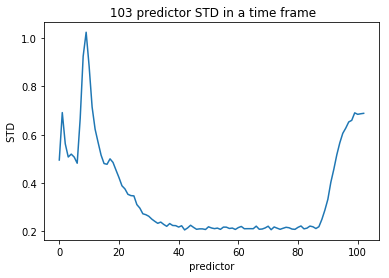

In [113]:
# get all EEG power columns
x_cols = [col for col in df.columns if col not in ['Time', 'BehaviorResponse']]

std_list = []

for col in x_cols:  
     std_list.append(np.std(df[col] ))

x = range(103)
plt.plot( x, std_list )
plt.title(" 103 predictor STD in a time frame")
plt.xlabel(" predictor ")
plt.ylabel(" STD ")
plt.show()

In [119]:
print "the largest STD: ", max(std_list)
print "And the frequency brand is ", np.argsort(-np.array(std_list))[0]

the largest STD:  1.02438689155
And the frequency brand is  9


# b 

In [148]:
S_matrix = df.copy()

for col_idx in range(1,104):
    col_label = df.columns[col_idx]
    S_matrix[col_label] = df.iloc[:,col_idx] / std_list[col_idx-1]

print "after nomalization"
S_matrix.head()

after nomalization


,Time,F0Hz_1,F1Hz_2,F3Hz_3,F4Hz_4,F5Hz_5,F6Hz_6,F8Hz_7,F9Hz_8,F10Hz_9,...,F115Hz_95,F116Hz_96,F117Hz_97,F119Hz_98,F120Hz_99,F121Hz_100,F122Hz_101,F124Hz_102,F125Hz_103,BehaviorResponse
0,5.004,6.291898,2.424252,1.951658,1.775085,1.034106,0.896090,1.064482,-0.197641,-0.131436,...,-5.687783,-5.225714,-5.319493,-4.994025,-4.959565,-4.663260,-4.786165,-4.804148,-4.814392,1.0
1,15.004,5.784684,2.168805,1.563892,2.010472,0.541587,1.423545,0.178680,0.120201,0.129442,...,-4.690328,-4.279709,-4.588564,-4.900921,-4.287033,-3.890943,-3.950108,-4.321606,-4.431214,1.0
2,25.004,4.118641,1.528940,0.290118,0.693520,0.287928,0.641878,0.481401,0.427343,-0.085665,...,-4.958739,-4.849409,-4.659669,-4.740487,-4.621992,-4.333710,-4.379607,-4.401712,-4.376144,1.0
3,35.004,4.881719,0.503335,1.035959,0.924062,0.340640,0.230252,0.415628,0.250033,0.200464,...,-6.443162,-6.452997,-6.016321,-5.584687,-5.809050,-5.873850,-5.859437,-5.577333,-5.588787,1.0
4,45.004,5.065028,1.499133,1.107631,0.860057,0.896531,1.387788,0.101558,-0.491945,0.079887,...,-5.009299,-4.635564,-4.638529,-4.703309,-4.540275,-4.164482,-4.228484,-4.464120,-4.547605,1.0


In [163]:
for col in range(1,104):
    if round(np.std(S_matrix[S_matrix.columns[col]])) == 1:
        pass
    else:
        print "error"
print "verified"

verified


## c. (3 points) Compute the top 20 principal components (PCs) of the predictors. Make a plot showing the value of PC1 as a function of time throughout the experiment. Make similar plot showing the values of PC2 and PC3 vs. time

In [203]:
from sklearn.decomposition import PCA

data = S_matrix.iloc[:,1:104]
print data.shape

(926, 103)


(926, 20)


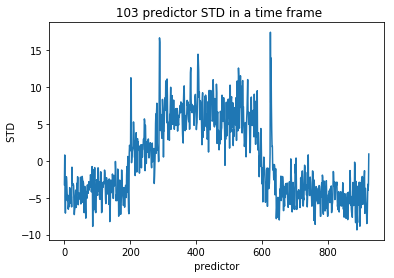

In [207]:
pca = PCA(n_components=20)
new_data = pca.fit_transform(data)
print new_data.shape

x = range(926)
plt.plot( x, new_data[:,0] )
plt.title(" PC1 VS Time")
plt.xlabel(" time ")
plt.ylabel(" PC1 ")
plt.show()

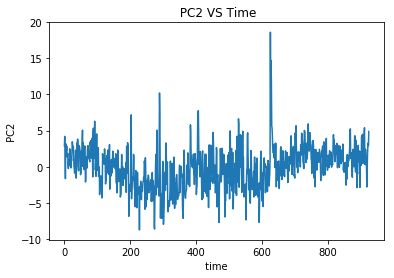

In [208]:
x = range(926)
plt.plot( x, new_data[:,1] )
plt.title(" PC2 VS Time")
plt.xlabel(" time ")
plt.ylabel(" PC2 ")
plt.show()

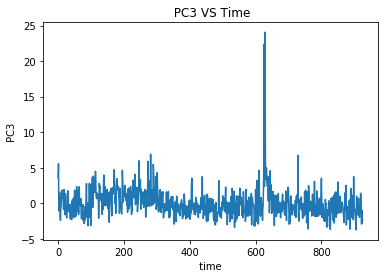

In [209]:
x = range(926)
plt.plot( x, new_data[:,2] )
plt.title(" PC3 VS Time")
plt.xlabel(" time ")
plt.ylabel(" PC3 ")
plt.show()

### d. (4 points) Run PC regression by fitting a series of linear models using the top k=1, 2, 3, …, 20   principal components. Use 10fold  crossvalidation to estimate the test set error for each linear model. Make a plot showing the MSE for training and test data as a function of k.

In [511]:
from sklearn import linear_model
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

train_mse_list = []
test_mse_list = []

for k in range(1,21):

    pca = PCA(n_components=k)
    new_data = pca.fit_transform(data)
    
    train_mse_temp = []
    test_mse_temp = []
    
    #define K fold 
    kf = KFold (n_splits= 10 , shuffle = True) 
    
    for train_idx, test_indx in kf.split(new_data):
        
        X_train, X_test = new_data[train_idx], new_data[test_indx]
        
        y_train, y_test = df['BehaviorResponse'][train_idx], df['BehaviorResponse'][test_indx]
    
        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X_train , y_train)
        
        # Make prediction using both train and test data
        pred_train =  regr.predict(X_train)
        pred_test = regr.predict(X_test)

        train_mse = mean_squared_error(pred_train, y_train)
        test_mse = mean_squared_error(pred_test, y_test)

        train_mse_temp.append(train_mse)
        test_mse_temp.append(test_mse)
        
    train_mse_list.append(np.mean(train_mse_temp))
    test_mse_list.append(np.mean(test_mse_temp))


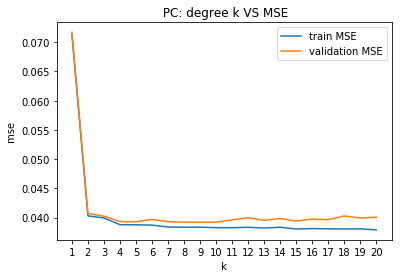

In [514]:
x = range (1,21)
plt.xticks(range(1,21))
plt.plot(x, train_mse_list , label ='train MSE')
plt.plot(x, test_mse_list , label ='validation MSE')
plt.title(" PC: degree k VS MSE")
plt.xlabel(" k ")
plt.ylabel(" mse ")
plt.legend()
plt.show()

### e. (1 point) Based on these results, what value of k would you select to provide the best predictive accuracy?

#### based on the result, I think both k=4 is good because it might overfit if we add more predictors and this is a reasonable transition spot where the MSE is low as well

### f. (1 point) Conceptual question (no coding required): Consider a linear model that includes just the top PC (k=1). Which frequencies contribute to this model’s prediction? Explain

#### the 10th(9th starting from index 0) frequency contribute most to this model’s prediction because for this one its variance is the MAX .  PC 1 caputrues the max var of any linear comb of the predictors.


## Q 3. Polynomial and spline regression
### try to fit smooth curves to the timecourse of the behavioral response variable in the Anesthesia dataset.

### a. (1 point) Plot BehaviorResponse vs. time.

In [368]:
# Part A
# Make a plot of Time Vs. BehaviorResponse for the anesthesia data.
time = df['Time']
BehaviorResponse = df['BehaviorResponse']

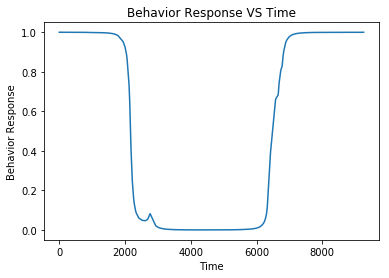

In [369]:
plt.plot( time, BehaviorResponse)
plt.title("Behavior Response VS Time")
plt.xlabel("Time")
plt.ylabel("Behavior Response")
plt.show()


### b)  Fit a linear model of the form: , where is BehaviorResponse y = β0 + β1x y and x is time. Plot the resulting prediction, yˆ , as a function of time and overlay it on top of the true data. Is this model too simple or too complex for this dataset?

[1.74252205e-05 0.00000000e+00]


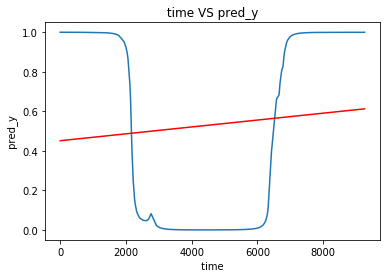

In [535]:
from sklearn import linear_model

cosnt_df = pd.Series(np.ones(926))
new_time = pd.concat([time, cosnt_df], axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(new_time , BehaviorResponse)

# Make predictions using the testing set
pred_y = regr.predict(new_time)

print regr.coef_

plt.plot( time, BehaviorResponse)
plt.plot( time , pred_y , 'red')
plt.title(" time VS pred_y ")
plt.xlabel(" time ")
plt.ylabel(" pred_y ")
plt.show()

### Is this model too simple or too complex for this dataset?

### Obviously this model is too simple because it does not fit the dataset well

### c. (2 points) Fit polynomials of order 2 (quadratic), 3 (cubic), 5, 10 and 20. For each polynomial, plot yˆ vs. time.

polynomials of order 2


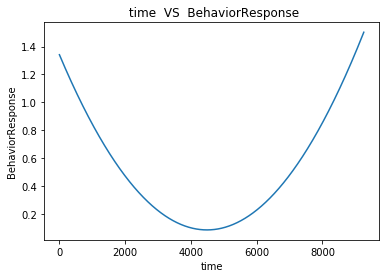

In [460]:
print "polynomials of order 2"

weights = np.polyfit(time, BehaviorResponse, 2)
model = np.poly1d(weights)
y_plot = model(time)
plt.plot(time, y_plot)
plt.title(" time  VS  BehaviorResponse")
plt.xlabel("time")
plt.ylabel('BehaviorResponse')
plt.show()

polynomials of order 2


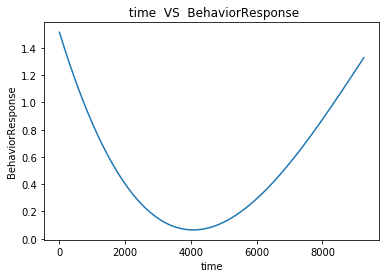

In [461]:
print "polynomials of order 2"

weights = np.polyfit(time, BehaviorResponse, 3)
model = np.poly1d(weights)
y_plot = model(time)
plt.plot(time, y_plot)
plt.title(" time  VS  BehaviorResponse")
plt.xlabel("time")
plt.ylabel('BehaviorResponse')
plt.show()

polynomials of order 5


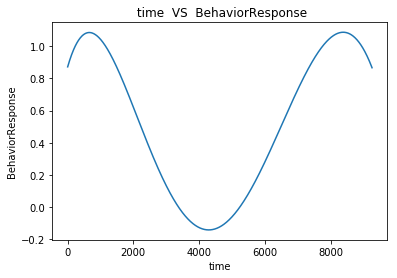

In [462]:
print "polynomials of order 5"

weights = np.polyfit(time, BehaviorResponse, 5)
model = np.poly1d(weights)
y_plot = model(time)
plt.plot(time, y_plot)
plt.title(" time  VS  BehaviorResponse")
plt.xlabel("time")
plt.ylabel('BehaviorResponse')
plt.show()

polynomials of order 10


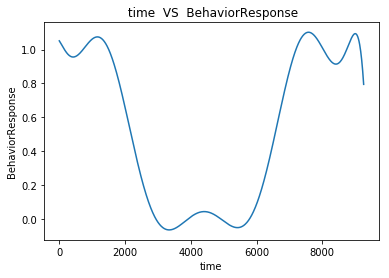

In [463]:
print "polynomials of order 10"

weights = np.polyfit(time, BehaviorResponse, 10)
model = np.poly1d(weights)
y_plot = model(time)
plt.plot(time, y_plot)
plt.title(" time  VS  BehaviorResponse")
plt.xlabel("time")
plt.ylabel('BehaviorResponse')
plt.show()

polynomials of order 20


/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


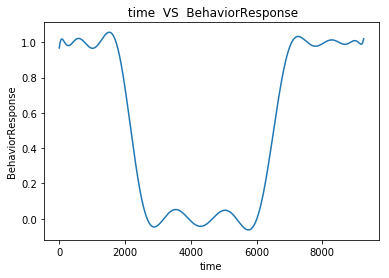

In [524]:
print "polynomials of order 20"

weights = np.polyfit(time, BehaviorResponse, 20)
model = np.poly1d(weights)
y_plot = model(time)

plt.plot(time, y_plot)
plt.title(" time  VS  BehaviorResponse")
plt.xlabel("time")
plt.ylabel('BehaviorResponse')
plt.show()

### d. (3 points) Using 10 fold crossvalidation, determine the testing MSE for all polynomials of order 1 up to 20. Plot the training and test MSE vs. model order.

In [548]:
train_mse_list = []
test_mse_list = []

for k in range(1,21):

    train_mse_temp = []
    test_mse_temp = []
    
    #define K fold 
    kf = KFold (n_splits= 10 , shuffle = True) 
    
    for train_idx, test_indx in kf.split(df['Time']):
        
        X_train, X_test = df['Time'][train_idx], df['Time'][test_indx]
        
        y_train, y_test = df['BehaviorResponse'][train_idx], df['BehaviorResponse'][test_indx]
    
        # training 
        weights = np.polyfit(X_train.reshape(-1), y_train, k)
        model = np.poly1d(weights)
        
        # Make prediction using both train and test data
        pred_train =  model(X_train) 
        pred_test = model(X_test)

        train_mse = mean_squared_error(pred_train, y_train)
        test_mse = mean_squared_error(pred_test, y_test)

        train_mse_temp.append(train_mse)
        test_mse_temp.append(test_mse)
        
    train_mse_list.append(np.mean(train_mse_temp))
    test_mse_list.append(np.mean(test_mse_temp))


/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/xuzhaokai/anaconda2/lib/pyt

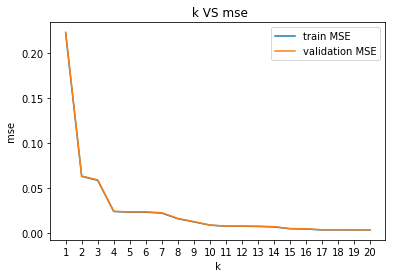

In [549]:
x = range (1,21)
plt.xticks(range(1,21))
plt.plot(x, train_mse_list , label ='train MSE')
plt.plot(x, test_mse_list , label ='validation MSE')
plt.title(" k VS mse")
plt.xlabel(" k ")
plt.ylabel(" mse ")
plt.legend()
plt.show()

In [551]:
print "min train MSE: ", np.argsort(train_mse_list)[0]
print "min val MSE: ", np.argsort(test_mse_list)[0]

min train MSE:  16
min val MSE:  18


### e . (1 point) Based on these results, what model order would you recommend for fitting these data?

### Based on the above plot, I think using a degree of 16--18 poly to fit the data should get a good result because this